# Retomando...
* Bitcoin

In [1]:
import pandas as pd
df = pd.read_csv("BTC-USD.csv", header=0, sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
2826,2022-09-27,19221.839844,20338.455078,18915.667969,19110.546875,19110.546875,58571439619
2827,2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,19426.720703,53071298734
2828,2022-09-29,19427.779297,19589.265625,18924.353516,19573.050781,19573.050781,41037843771
2829,2022-09-30,19573.431641,20109.849609,19265.662109,19431.789063,19431.789063,43975248085


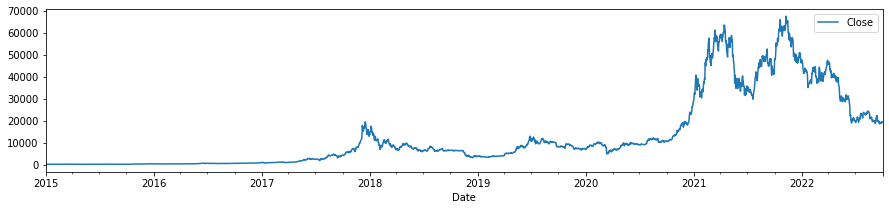

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df[['Close']].plot(figsize=(15,3))

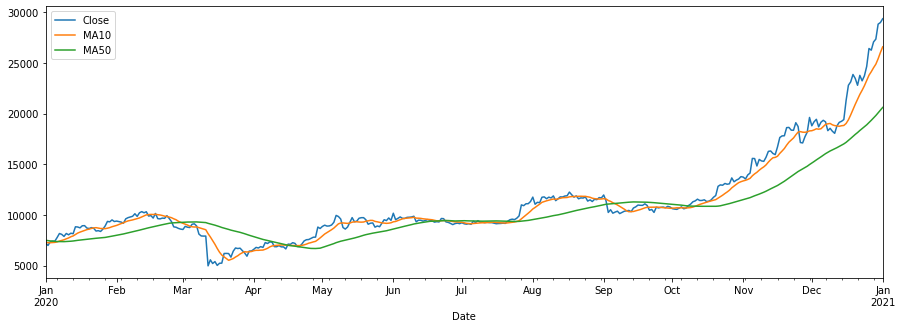

In [3]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA100'] = df['Close'].rolling(100).mean()
## Cruzamento das médias móveis
df[["Close",'MA10', 'MA50']]['01-01-2020':'01-01-2021'].plot(figsize = (15,5))

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100
Date,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN,NaN,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN,NaN,NaN
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,NaN,NaN,NaN
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,NaN,NaN,NaN


# Para quê utilizamos ML?
* Previsão
* Tomada de decisão
* Análise de cenários
* Recomendações

**No contexto de Criptomoedas, o que poderia ser feito?**
* Lembrete: em ML consideramos -> Data + Result = Computer Program​

# Linear Regression 
* The term regression is used when you try to find the relationship between variables.
* Linear regression uses the least square method.
* The concept is to draw a line through all the plotted data points. The line is positioned in a way that it minimizes the distance (i.e. errors) to all of the data points.
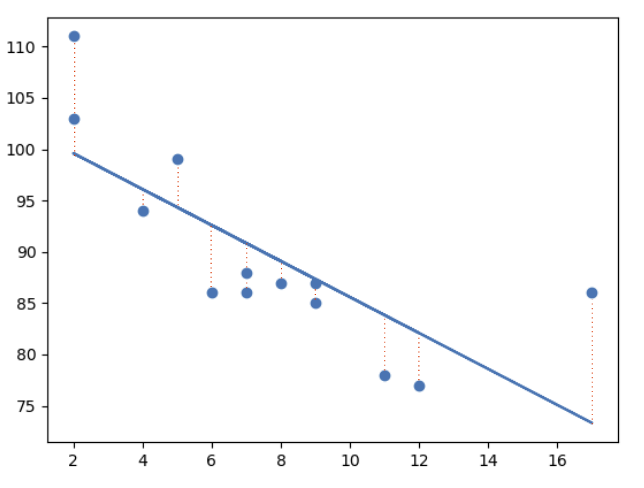


# Decisão de Projeto:
* Desenvolver um modelo de ML para previsão do valor de fechamento (Close) do Bitcoin no dia seguinte.
* Este (Close) será o nosso "alvo" a ser previsto
  * Os dados serão dividos, portanto em: (1) dados sem 'Close', que serão entrada e (2) dados com 'Close', que serão o resultado esperado

In [5]:
df['Close_Tomorrow'] = df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100,Close_Tomorrow
Date,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN,NaN,NaN,315.032013
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN,NaN,NaN,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,NaN,NaN,NaN,274.473999
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,NaN,NaN,NaN,286.188995


In [6]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100,Close_Tomorrow
Date,,,,,,,,,,
2015-04-10,243.694000,243.694000,232.770996,236.072006,236.072006,28882000,250.233601,260.531001,251.112071,236.552002
2015-04-11,236.016006,239.537003,234.175003,236.552002,236.552002,16365200,249.161601,260.386461,250.335101,236.153000
2015-04-12,236.535004,237.727997,233.494995,236.153000,236.153000,12387900,247.476401,260.218841,249.546311,224.587006
2015-04-13,235.949997,236.934998,221.996002,224.587006,224.587006,31181800,244.502901,259.991041,248.981361,219.158997
2015-04-14,224.759003,224.975998,216.322998,219.158997,219.158997,31719000,241.049100,259.596381,248.531001,223.832993


In [7]:
y = df['Close_Tomorrow']
X = df.drop(["Close_Tomorrow"], axis=1)

In [8]:
y

Date
2015-04-10      236.552002
2015-04-11      236.153000
2015-04-12      224.587006
2015-04-13      219.158997
2015-04-14      223.832993
                  ...     
2022-09-26    19110.546875
2022-09-27    19426.720703
2022-09-28    19573.050781
2022-09-29    19431.789063
2022-09-30    19312.095703
Name: Close_Tomorrow, Length: 2731, dtype: float64

In [9]:
X

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100
Date,,,,,,,,,
2015-04-10,243.694000,243.694000,232.770996,236.072006,236.072006,28882000,250.233601,260.531001,251.112071
2015-04-11,236.016006,239.537003,234.175003,236.552002,236.552002,16365200,249.161601,260.386461,250.335101
2015-04-12,236.535004,237.727997,233.494995,236.153000,236.153000,12387900,247.476401,260.218841,249.546311
2015-04-13,235.949997,236.934998,221.996002,224.587006,224.587006,31181800,244.502901,259.991041,248.981361
2015-04-14,224.759003,224.975998,216.322998,219.158997,219.158997,31719000,241.049100,259.596381,248.531001
...,...,...,...,...,...,...,...,...,...
2022-09-26,18803.900391,19274.873047,18721.285156,19222.671875,19222.671875,44148798321,19220.237109,20975.185195,21252.748594
2022-09-27,19221.839844,20338.455078,18915.667969,19110.546875,19110.546875,58571439619,19118.534180,20881.206406,21238.321348
2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,19426.720703,53071298734,19119.255664,20806.454453,21226.593184


In [10]:
testStartDate = '01-01-2022'

X_train, y_train  =  X[:testStartDate], y[:testStartDate]
X_test, y_test    = X[testStartDate:], y[testStartDate:]

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
linreg = model.fit(X_train, y_train) #y_train..ravel()??
pred = model.predict(X_test)
pred

array([47499.50495796, 47262.90825912, 46415.70501062, 45749.57690619,
       43514.533209  , 43059.0807002 , 41584.74776569, 41607.27190555,
       41721.9569341 , 41844.01610148, 42595.06616296, 43822.00622698,
       42555.82589222, 43011.29262411, 43059.13623743, 43021.85946748,
       42216.63962822, 42320.23242099, 41687.26907105, 40458.46453315,
       36516.06882823, 34962.40458997, 36077.7907417 , 36739.70247492,
       36845.404019  , 36629.29202987, 37115.49597597, 37723.35047503,
       38022.09792812, 37856.8857006 , 38467.64048379, 38649.56386068,
       36919.41143263, 37083.69964207, 41316.73404746, 41397.31290171,
       42338.04217945, 43787.32590217, 44096.52915101, 44344.97167935,
       43475.62286275, 42402.33569134, 42155.25205813, 42088.50202566,
       42517.28052726, 44455.90799898, 43968.00207066, 40594.9455189 ,
       39948.14142374, 40005.19714895, 38404.80342517, 36943.13400427,
       38181.23987252, 37161.92288153, 38432.22808237, 39099.26485444,
      

In [12]:
df_pred = pd.DataFrame(pred, columns=['Pred'], index = y[testStartDate:].index)
df_pred

,Pred
Date,
2022-01-01,47499.504958
2022-01-02,47262.908259
2022-01-03,46415.705011
2022-01-04,45749.576906
2022-01-05,43514.533209
...,...
2022-09-26,19228.481744
2022-09-27,19083.543823
2022-09-28,19479.405707


In [13]:
combined = pd.concat([df, df_pred], ignore_index=False, axis=1)
combined.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100,Close_Tomorrow,Pred
Date,,,,,,,,,,,
2022-09-26,18803.900391,19274.873047,18721.285156,19222.671875,19222.671875,44148798321,19220.237109,20975.185195,21252.748594,19110.546875,19228.481744
2022-09-27,19221.839844,20338.455078,18915.667969,19110.546875,19110.546875,58571439619,19118.534180,20881.206406,21238.321348,19426.720703,19083.543823
2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,19426.720703,53071298734,19119.255664,20806.454453,21226.593184,19573.050781,19479.405707
2022-09-29,19427.779297,19589.265625,18924.353516,19573.050781,19573.050781,41037843771,19122.147852,20718.962617,21215.217715,19431.789063,19631.798885
2022-09-30,19573.431641,20109.849609,19265.662109,19431.789063,19431.789063,43975248085,19176.247852,20628.447813,21209.665313,19312.095703,19433.131114


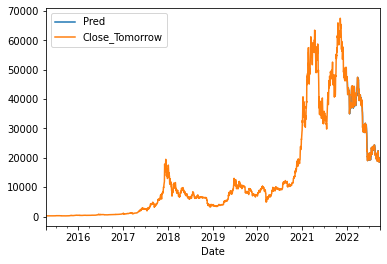

In [14]:
combined[['Pred','Close_Tomorrow']].plot()

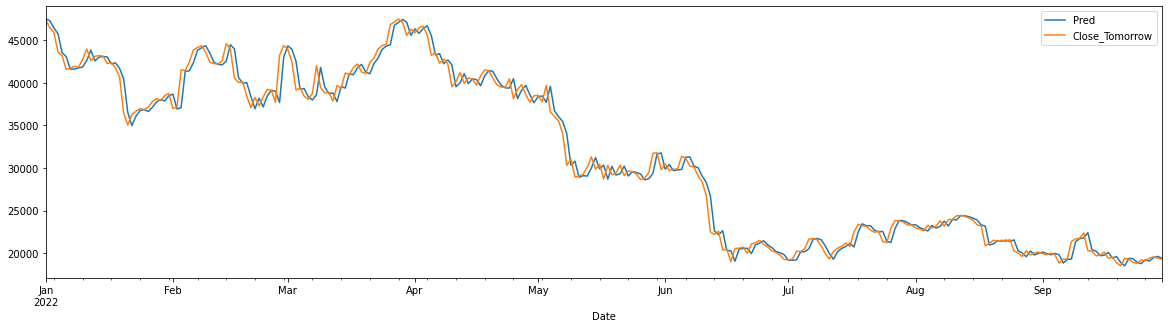

In [15]:
combined[['Pred','Close_Tomorrow']][testStartDate:].plot(figsize=(20,5))

# Cuidados!
* Previsão acertada no passado não garante previsão correta para o futuro! - Problema do peru no dia de ação de graças (indução de David Hume ou Cisne Negro).
* Alguns modelos se adaptam demais aos dados ou necessitam de dados normalizados.
* É necessário trabalhar melhor com  os conjuntos de dados e utilizar mais etapas de desenvolvimento para que o modelo seja confiável.
  * Melhorar a validação contra riscos, uso de conjunto de dados de validação e usar Cross Validation, além de trabalhar mais com a extração de características dos dados (indicadores técnicos).
* Pode-se utilizar modelos mais interessantes e eficientes para não-linearidades:
  * SVM, Redes Neurais, etc.

**No entanto, não deixa de ser um primeiro passo na área de ML e previsões.**

**É possível explorar conjuntos de dados pela internet e fazer Análise Exploratória de dados e previsões em Python!**

https://www.kaggle.com/

Algumas publicações:
https://scholar.google.com/scholar?hl=pt-BR&as_sdt=0%2C5&q=carosia+stock+market&btnG=

**Para finalizar, um projeto final de previsão de mercado.**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

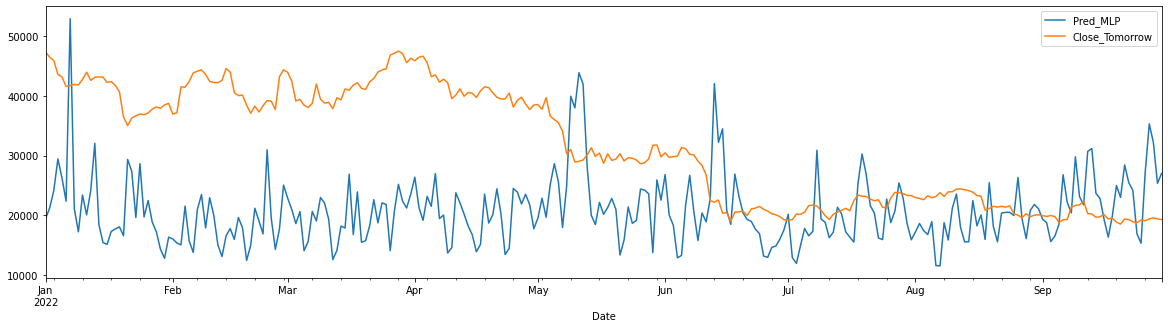

In [16]:
#Outros modelos

#Redes Neurais
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=500, early_stopping = True)
linreg = model.fit(X_train, y_train) #y_train..ravel()??
pred = model.predict(X_test)

df_pred = pd.DataFrame(pred, columns=['Pred_MLP'], index = y[testStartDate:].index)
df_pred

combined = pd.concat([df, df_pred], ignore_index=False, axis=1)

combined[['Pred_MLP','Close_Tomorrow']][testStartDate:].plot(figsize=(20,5))